<a href="https://colab.research.google.com/github/zcaksyu/2022-fall-main/blob/master/generate_depression_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_rows', 200)


Mounted at /content/drive


In [2]:
webmd = pd.read_csv('/content/drive/MyDrive/w266/webmd.csv')
webmd.shape

(362806, 12)

In [3]:
webmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [4]:
webmd.describe(include = 'all')

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
count,362806,362806,362806,362806,362806.000000,362806.000000,362806.000000,362769,362806.000000,362806,362806,362806.000000
unique,12,1806,4524,7093,NaN,NaN,NaN,250167,NaN,3,1651,NaN
top,45-54,Other,10/29/2007,cymbalta,NaN,NaN,NaN,,NaN,Female,,NaN
freq,80043,49765,404,4648,NaN,NaN,NaN,41824,NaN,238226,17460,NaN
mean,NaN,NaN,NaN,NaN,36879.370774,4.019829,3.532061,NaN,3.135408,NaN,NaN,6.744916
std,NaN,NaN,NaN,NaN,52624.412971,1.317711,1.455961,NaN,1.611106,NaN,NaN,9.324240
min,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,4896.000000,3.000000,3.000000,NaN,1.000000,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,9548.000000,5.000000,4.000000,NaN,3.000000,NaN,NaN,4.000000
75%,NaN,NaN,NaN,NaN,63522.000000,5.000000,5.000000,NaN,5.000000,NaN,NaN,9.000000


In [5]:
webmd.Condition.value_counts()[:20]

Other                                                        49765
Pain                                                         25232
High Blood Pressure                                          23275
Depression                                                   14509
Birth Control                                                12253
Neuropathic Pain                                              8988
Type 2 Diabetes Mellitus                                      7648
Chronic Trouble Sleeping                                      7408
Attention Deficit Disorder with Hyperactivity                 6801
Bipolar Depression                                            5946
Migraine Prevention                                           4988
Panic Disorder                                                4867
Major Depressive Disorder                                     4256
Repeated Episodes of Anxiety                                  4138
Rheumatoid Arthritis                                          

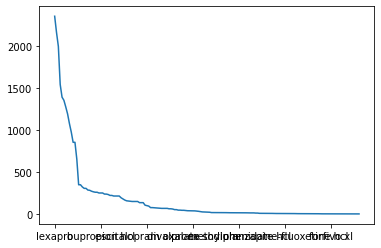

In [6]:
webmd['Condition'] = webmd.Condition.str.lower()
depressed = webmd[webmd['Condition'].str.contains('depress')]
depression_drug_count = depressed.Drug.value_counts()
depression_drug_count.plot()

In [7]:
depression_drug_count

lexapro                                                                                                                             2353
effexor xr                                                                                                                          2160
cymbalta                                                                                                                            1994
zoloft                                                                                                                              1541
celexa                                                                                                                              1390
wellbutrin xl                                                                                                                       1353
seroquel                                                                                                                            1275
prozac                                   

In [8]:
depression_drug = webmd[(webmd['Drug'].isin(depression_drug_count[depression_drug_count>1000].index.to_list())) & (~webmd['Condition'].isin(['other', ' ']))]


In [9]:
depression_drug.describe(include = 'all')

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
count,22218,22218,22218,22218,22218.000000,22218.000000,22218.000000,22218,22218.000000,22218,22218,22218.000000
unique,12,33,3394,9,NaN,NaN,NaN,19432,NaN,3,9,NaN
top,45-54,depression,10/29/2007,cymbalta,NaN,NaN,NaN,,NaN,Female,"Nausea , dry mouth , constipation , loss of ...",NaN
freq,5242,9073,88,4134,NaN,NaN,NaN,2734,NaN,16988,4134,NaN
mean,NaN,NaN,NaN,NaN,45258.049464,4.184445,3.568548,NaN,3.257899,NaN,NaN,7.088712
std,NaN,NaN,NaN,NaN,45146.982551,1.217421,1.419552,NaN,1.561225,NaN,NaN,9.117923
min,NaN,NaN,NaN,NaN,35.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,4896.000000,4.000000,3.000000,NaN,2.000000,NaN,NaN,2.000000
50%,NaN,NaN,NaN,NaN,8603.000000,5.000000,4.000000,NaN,4.000000,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,76851.000000,5.000000,5.000000,NaN,5.000000,NaN,NaN,9.000000


In [10]:
depression_drug.pivot_table(index = ['Drug', 'Condition'], 
                            aggfunc = {'DrugId': 'count',
                                       'EaseofUse': np.mean,
                                       'Effectiveness': np.mean,
                                       'Satisfaction': np.mean,	
                                       'UsefulCount': np.mean 
                                       }).sort_values(by=['Drug', 'DrugId'], ascending = False)


DrugId  \
Drug          Condition                                                    
zoloft        depression                                            1295   
              panic disorder                                         468   
              bipolar depression                                     151   
              posttraumatic stress syndrome                          111   
              obsessive compulsive disorder                           92   
              extreme apprehension or fear of social interaction      81   
              premenstrual disorder with a state of unhappiness       65   
              major depressive disorder                               38   
              anxiousness associated with depression                  35   
              depressed mood disorder occurring every year at...      22   
              premature ejection of semen                             16   
              repeated episodes of anxiety                             9   
wellbutrin xl depression                                            1065   
              stop smoking                                           149   
              bipolar depression                                     148   
              major depressive disorder                              104   
              attention deficit disorder with hyperactivity           53   
              depressed mood disorder occurring every year at...      28   
              anxiousness associated with depression                   8   
seroquel      bipolar depression                                     680   
              additional medications to treat depression             422   
              bipolar i disorder with most recent episode mixed      210   
              manic-depression                                       173   
              schizophrenia                                          132   
              mania associated with bipolar disorder                 107   
              mental disorder with loss of normal personality...      93   
              bipolar disorder in remission                           69   
              repeated episodes of anxiety                             6   
prozac        depression                                             941   
              bipolar depression                                     148   
              panic disorder                                         144   
              obsessive compulsive disorder                           68   
              "change of life" signs                                  65   
              premenstrual disorder with a state of unhappiness       55   
              major depressive disorder                               42   
              posttraumatic stress syndrome                           42   
              depressed mood disorder occurring every year at...      25   
              depression following delivery of baby                   24   
              bulimia                                                 12   
              disorder characterized by stiff, tender & painf...      12   
              anorexia nervosa                                        10   
              anxiousness associated with depression                   9   
              overweight                                               7   
              premature ejection of semen                              7   
              repeated episodes of anxiety                             6   
              depression associated with bipolar disorder, ad...       2   
              muscle weakness associated with sleeping disease         1   
pristiq       depression                                             789   
              major depressive disorder                              191   
              repeated episodes of anxiety                           123   
              bipolar depression                                      96   
              panic disorder          

In [11]:
# noticing that lamictal tablet	 and lamictal  data are duplicating, removing one of the them 
depression_drug = depression_drug[depression_drug.Drug!='lamictal tablet']
depression_drug

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
28803,35-44,anxiousness associated with depression,2/6/2020,lexapro,63990,1,1,I got horrible brain zaps and very graphic tra...,1,Female,"Nausea , dry mouth , trouble sleeping , con...",0
28809,,"""change of life"" signs",1/23/2020,lexapro,63990,3,2,Blah,1,Female,"Nausea , dry mouth , trouble sleeping , con...",0
28817,55-64,depression,1/23/2020,lexapro,63990,5,3,It has helped my depression but not my anxiety...,3,Male,"Nausea , dry mouth , trouble sleeping , con...",0
28826,65-74,depression,1/21/2020,lexapro,63990,3,1,Was nauseated almost immediately. Diareaha and...,1,Female,"Nausea , dry mouth , trouble sleeping , con...",0
28834,75 or over,anxiousness associated with depression,12/27/2019,lexapro,63990,4,2,haven't seen much difference.,2,Female,"Nausea , dry mouth , trouble sleeping , con...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
361501,13-18,depression,12/21/2007,celexa,8603,5,1,Didn't help what-so-ever for my depression and...,1,Female,"Nausea , dry mouth , loss of appetite, tiredn...",2
361502,25-34,panic disorder,12/21/2007,celexa,8603,1,1,I was originally prescrobed Celexa to deal wit...,1,Female,"Nausea , dry mouth , loss of appetite, tiredn...",4
361503,25-34,panic disorder,12/20/2007,celexa,8603,5,5,I am taking Celexa along with Wellbutrin xl an...,5,Female,"Nausea , dry mouth , loss of appetite, tiredn...",13
361504,35-44,depression,12/20/2007,celexa,8603,5,5,I suffer from depression and noticed that when...,5,Female,"Nausea , dry mouth , loss of appetite, tiredn...",8


In [20]:
depression_drug = depression_drug[depression_drug.Satisfaction>3]
depression_drug

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
28845,35-44,depression,12/20/2019,lexapro,63990,5,5,I started taking Zoloft after I was diagnosed ...,4,Male,"Nausea , dry mouth , trouble sleeping , con...",2
28854,45-54,repeated episodes of anxiety,12/9/2019,lexapro,63990,5,5,Changed my life. I’ve tried several ssri’s ove...,5,Female,"Nausea , dry mouth , trouble sleeping , con...",0
28875,25-34,anxiousness associated with depression,10/15/2019,lexapro,63990,5,5,My doctor prescribed this due to my concern ov...,5,,"Nausea , dry mouth , trouble sleeping , con...",0
28885,19-24,repeated episodes of anxiety,10/11/2019,lexapro,63990,5,5,Don't let all the bad reviews scare you--Lexap...,5,,"Nausea , dry mouth , trouble sleeping , con...",1
28895,13-18,bipolar depression,10/6/2019,lexapro,63990,5,4,When i first started using the medication it d...,4,Female,"Nausea , dry mouth , trouble sleeping , con...",1
...,...,...,...,...,...,...,...,...,...,...,...,...
361498,45-54,depression,12/26/2007,celexa,8603,5,5,,5,Female,"Nausea , dry mouth , loss of appetite, tiredn...",1
361499,25-34,bipolar depression,12/26/2007,celexa,8603,5,3,,4,Female,"Nausea , dry mouth , loss of appetite, tiredn...",0
361503,25-34,panic disorder,12/20/2007,celexa,8603,5,5,I am taking Celexa along with Wellbutrin xl an...,5,Female,"Nausea , dry mouth , loss of appetite, tiredn...",13
361504,35-44,depression,12/20/2007,celexa,8603,5,5,I suffer from depression and noticed that when...,5,Female,"Nausea , dry mouth , loss of appetite, tiredn...",8


In [21]:
depression_drug.Drug.value_counts()

lexapro          2273
cymbalta         1899
effexor xr       1706
zoloft           1262
celexa           1158
seroquel          881
prozac            876
wellbutrin xl     754
pristiq           663
Name: Drug, dtype: int64

In [22]:
depression_drug.describe(include= 'all')

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
count,11472,11472,11472,11472,11472.000000,11472.000000,11472.000000,11472,11472.000000,11472,11472,11472.000000
unique,12,30,2872,9,NaN,NaN,NaN,9625,NaN,3,9,NaN
top,45-54,depression,10/29/2007,lexapro,NaN,NaN,NaN,,NaN,Female,"Nausea , dry mouth , trouble sleeping , con...",NaN
freq,2862,4642,63,2273,NaN,NaN,NaN,1822,NaN,8922,2273,NaN
mean,NaN,NaN,NaN,NaN,44054.889819,4.750959,4.569212,NaN,4.604690,NaN,NaN,8.052999
std,NaN,NaN,NaN,NaN,44335.267414,0.527137,0.590295,NaN,0.488939,NaN,NaN,10.345651
min,NaN,NaN,NaN,NaN,35.000000,1.000000,1.000000,NaN,4.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,4896.000000,5.000000,4.000000,NaN,4.000000,NaN,NaN,2.000000
50%,NaN,NaN,NaN,NaN,8603.000000,5.000000,5.000000,NaN,5.000000,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,76851.000000,5.000000,5.000000,NaN,5.000000,NaN,NaN,10.000000


In [23]:
depression_drug.Reviews[:10].to_list()

["I started taking Zoloft after I was diagnosed with depression. After experiencing the sexual side effects of that drug, trouble coming to climax, I was switched to Lexapro. The side effect mentioned wasn't nearly as severe and my mood and outlook improved dramatically. This medication has changed my life for the better. I have a better relationship with my wife and friends, my job performance has improved significantly as well. ",
 'Changed my life. I’ve tried several ssri’s over 10 yrs, this has helped me most. I don’t want to be without it. I can’t imagine returning to the place that I was before. ',
 "My doctor prescribed this due to my concern over constantly crying over stressful situations (due to anxiety and major depression) and it was happening on a daily basis. It was so bad that I couldn't work. The Lexapro really helped rather quickly. I'd say within a week or two I started noticing changes. I still think the same but I can brush things off that normally would make me cry

In [24]:
depression_drug.to_csv('/content/drive/MyDrive/w266/depression_drugs.csv')

In [25]:
train, test_validate = train_test_split(depression_drug, train_size = 0.8, random_state = 2022)
test, validate = train_test_split(test_validate, train_size = 0.5, random_state = 2022)

train.to_csv('/content/drive/MyDrive/w266/depression_drugs_train.csv')
test.to_csv('/content/drive/MyDrive/w266/depression_drugs_test.csv')
validate.to_csv('/content/drive/MyDrive/w266/depression_drugs_validate.csv')


## Some Quick EDA

In [26]:
train.shape

(9177, 12)

In [27]:
train.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,9177.000000,9177.000000,9177.000000,9177.000000,9177.000000
mean,43758.697069,4.753950,4.568051,4.603683,8.019178
std,44298.498167,0.525755,0.592726,0.489158,10.317109
min,35.000000,1.000000,1.000000,4.000000,0.000000
25%,4896.000000,5.000000,4.000000,4.000000,2.000000
50%,8603.000000,5.000000,5.000000,5.000000,5.000000
75%,76851.000000,5.000000,5.000000,5.000000,10.000000
max,150251.000000,5.000000,5.000000,5.000000,145.000000


In [28]:
train.pivot_table(index = ['Drug', 'Condition'], 
                  aggfunc = {'DrugId': 'count',
                              'EaseofUse': np.mean,
                              'Effectiveness': np.mean,
                              'Satisfaction': np.mean,	
                              'UsefulCount': np.mean 
                              }).sort_values(by=['Drug', 'DrugId'], ascending = False)

DrugId  \
Drug          Condition                                                    
zoloft        depression                                             504   
              panic disorder                                         231   
              bipolar depression                                      62   
              posttraumatic stress syndrome                           54   
              obsessive compulsive disorder                           47   
              premenstrual disorder with a state of unhappiness       41   
              extreme apprehension or fear of social interaction      35   
              depressed mood disorder occurring every year at...      11   
              major depressive disorder                               11   
              anxiousness associated with depression                   9   
              premature ejection of semen                              4   
              repeated episodes of anxiety                             3   
wellbutrin xl depression                                             394   
              bipolar depression                                      64   
              stop smoking                                            52   
              major depressive disorder                               38   
              depressed mood disorder occurring every year at...      15   
              attention deficit disorder with hyperactivity           13   
              anxiousness associated with depression                   2   
seroquel      bipolar depression                                     244   
              additional medications to treat depression             132   
              bipolar i disorder with most recent episode mixed       74   
              manic-depression                                        71   
              schizophrenia                                           51   
              mania associated with bipolar disorder                  43   
              bipolar disorder in remission                           39   
              mental disorder with loss of normal personality...      38   
              repeated episodes of anxiety                             2   
prozac        depression                                             415   
              panic disorder                                          67   
              bipolar depression                                      55   
              obsessive compulsive disorder                           35   
              "change of life" signs                                  33   
              premenstrual disorder with a state of unhappiness       33   
              major depressive disorder                               26   
              posttraumatic stress syndrome                           19   
              depression following delivery of baby                   11   
              depressed mood disorder occurring every year at...       9   
              bulimia                                                  6   
              repeated episodes of anxiety                             4   
              anxiousness associated with depression                   3   
              disorder characterized by stiff, tender & painf...       3   
              premature ejection of semen                              3   
              overweight                                               2   
pristiq       depression                                             303   
              major depressive disorder                               68   
              repeated episodes of anxiety                            44   
              bipolar depression                                      42   
              panic disorder                                          21   
              "change of life" signs                                  18   
              neuropathic pain                                        11   
              posttraumatic stress syn

In [29]:
train.Drug.value_counts()

lexapro          1799
cymbalta         1531
effexor xr       1365
zoloft           1012
celexa            950
prozac            724
seroquel          694
wellbutrin xl     578
pristiq           524
Name: Drug, dtype: int64

In [30]:
train.Condition.value_counts()

depression                                                       3698
repeated episodes of anxiety                                     1152
major depressive disorder                                         998
bipolar depression                                                685
panic disorder                                                    662
"change of life" signs                                            291
neuropathic pain                                                  281
posttraumatic stress syndrome                                     178
chronic muscle or bone pain                                       138
additional medications to treat depression                        132
disorder characterized by stiff, tender & painful muscles         132
obsessive compulsive disorder                                     129
extreme apprehension or fear of social interaction                 80
anxiousness associated with depression                             79
premenstrual disorde

In [31]:
# rough estimation of how ,ong are the words
review_len = train.Reviews.apply(lambda x: len(x.split(' ')))
review_len.describe()

count    9177.000000
mean       57.680288
std        61.746963
min         1.000000
25%        13.000000
50%        40.000000
75%        80.000000
max       394.000000
Name: Reviews, dtype: float64

In [32]:
np.mean(review_len<=100)

# most of the review are under 100 words, should be a good threshold for length cut out. 

0.8228179143510951

In [35]:
# noticing some really long review 
print(train[review_len==394].iloc[0])
print(train.Reviews[review_len==394].iloc[0])


Age                                                          55-64
Condition                                         neuropathic pain
Date                                                      7/8/2011
Drug                                                    effexor xr
DrugId                                                        4896
EaseofUse                                                        5
Effectiveness                                                    5
Reviews          I have had severe Fibromyalgia for about 15 ye...
Satisfaction                                                     4
Sex                                                               
Sides            Nausea , drowsiness,  dizziness ,  dry mouth ,...
UsefulCount                                                      9
Name: 262651, dtype: object
I have had severe Fibromyalgia for about 15 years but not diagnosed until 6 years ago.  Since then I have been taking Gabapentin 600mg 3 x a day, Skelaxin 800mg 3 x a d